#### Lineaer Regression

* Attempts to establish how X causes Y

##### Correlation vs Linear Regression

**Similarities**

* Quantify the direction and strenght of the relationship

**Differences**

* Correlation is a single statistic
* Linear regression produces an equation

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

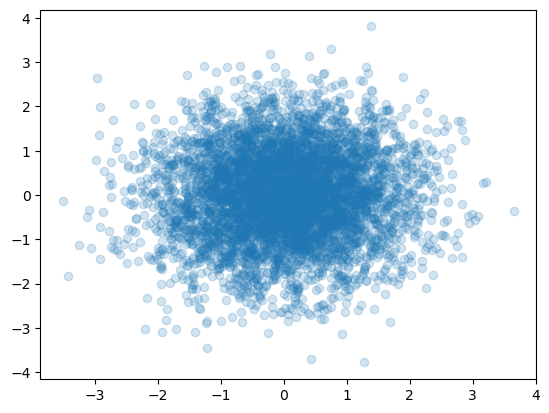

In [8]:
fig, ax = plt.subplots()
ax.scatter(X,Y,alpha=.2)

In [9]:
tickers = ['AAPL', 'BABA', 'IBM', 'MSFT','^SPX']
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 3, 1)
data = pdr.get_data_stooq(tickers, start, end)

In [10]:
data = data[::-1]

In [12]:
data.head()

Attributes    Close                                        High           \
Symbols        AAPL    BABA      IBM     MSFT     ^SPX     AAPL     BABA   
Date                                                                       
2020-01-02  73.5616  219.77  116.720  156.133  3257.85  73.6225  219.980   
2020-01-03  72.8488  217.00  115.784  154.216  3234.85  73.6185  218.203   
2020-01-06  73.4250  216.64  115.569  154.613  3246.28  73.4649  217.160   
2020-01-07  73.0831  217.63  115.656  153.183  3237.18  73.6972  218.940   
2020-01-08  74.2575  218.00  116.623  155.656  3253.05  74.5626  220.650   

Attributes                             ...     Open                            \
Symbols         IBM     MSFT     ^SPX  ...     AAPL    BABA      IBM     MSFT   
Date                                   ...                                      
2020-01-02  117.159  156.231  3258.14  ...  72.5537  216.60  116.359  154.365   
2020-01-03  116.242  155.517  3246.15  ...  72.7790  216.35  115.129  153.918   
2020-01-06  115.696  154.683  3246.84  ...  71.9515  214.89  114.993  152.688   
2020-01-07  116.330  155.249  3244.91  ...  73.4350  217.64  115.227  154.900   
2020-01-08  117.111  156.301  3267.07  ...  72.7810  216.60  115.940  154.514   

Attributes                 Volume                                          \
Symbols        ^SPX          AAPL        BABA           IBM          MSFT   
Date                                                                        
2020-01-02  3244.67  1.384613e+08  15882903.0  3.653332e+06  2.328220e+07   
2020-01-03  3226.36  1.495753e+08   8608281.0  2.753980e+06  2.172604e+07   
2020-01-06  3217.55  1.210384e+08  11892484.0  2.815041e+06  2.142262e+07   
2020-01-07  3241.86  1.138238e+08   9539012.0  3.800835e+06  2.250785e+07   
2020-01-08  3238.59  1.351095e+08  11983091.0  5.042468e+06  2.855639e+07   

Attributes                
Symbols             ^SPX  
Date                      
2020-01-02  1.921250e+09  
2020-01-03  1.922939e+09  
2020-01-06  2.041150e+09  
2020-01-07  1.900211e+09  
2020-01-08  2.067161e+09  

[5 rows x 25 columns]

In [14]:
data = data['Close']

In [16]:
data

Symbols,AAPL,BABA,IBM,MSFT,^SPX
Date,,,,,
2020-01-02,73.5616,219.77,116.720,156.133,3257.85
2020-01-03,72.8488,217.00,115.784,154.216,3234.85
2020-01-06,73.4250,216.64,115.569,154.613,3246.28
2020-01-07,73.0831,217.63,115.656,153.183,3237.18
2020-01-08,74.2575,218.00,116.623,155.656,3253.05
...,...,...,...,...,...
2021-02-23,124.5600,252.75,110.962,229.716,3881.37
2021-02-24,124.0510,250.34,113.256,230.966,3925.43
2021-02-25,119.7240,240.18,112.573,225.487,3829.34


In [17]:
log_returns = np.log(data/data.shift())

In [18]:
log_returns

Symbols,AAPL,BABA,IBM,MSFT,^SPX
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009737,-0.012684,-0.008052,-0.012354,-0.007085
2020-01-06,0.007878,-0.001660,-0.001859,0.002571,0.003527
2020-01-07,-0.004667,0.004559,0.000753,-0.009292,-0.002807
2020-01-08,0.015942,0.001699,0.008326,0.016015,0.004890
...,...,...,...,...,...
2021-02-23,-0.001115,-0.004933,-0.001144,-0.005254,0.001255
2021-02-24,-0.004095,-0.009581,0.020463,0.005427,0.011288
2021-02-25,-0.035504,-0.041431,-0.006049,-0.024008,-0.024783


In [19]:
ticker_a = 'AAPL'
ticker_b = '^SPX'

In [33]:
def linear_regression(ticker_a,ticker_b):
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1,1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1,1)

    lin_regr = LinearRegression()
    lin_regr.fit(X,Y)

    Y_pred = lin_regr.predict(X)

    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]

    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c = "r")

In [34]:
alpha, beta

(-0.0004886105071048049, 0.5954001880402655)

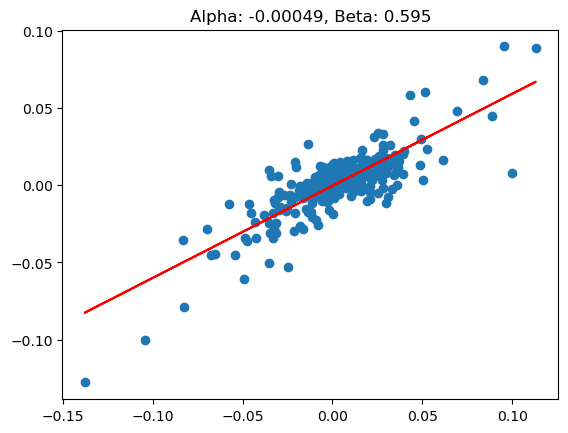

In [35]:
linear_regression("AAPL","^SPX")

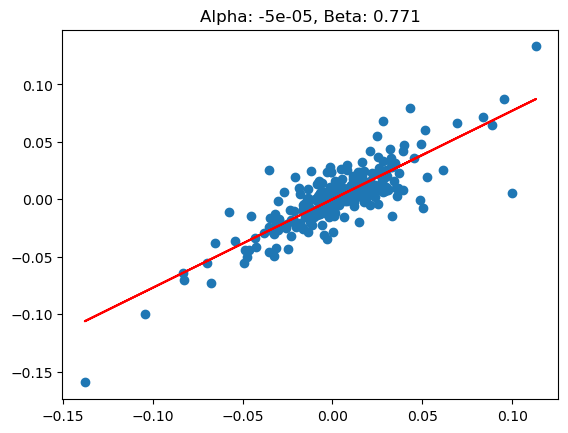

In [36]:
linear_regression("AAPL","MSFT")

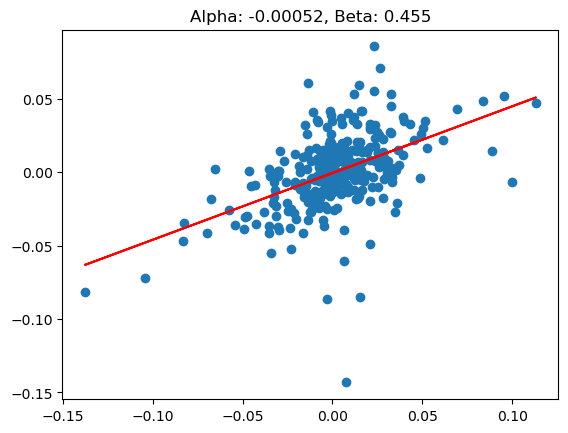

In [37]:
linear_regression("AAPL","BABA")